In [45]:
#Loading Packages
!pip install pandas
!pip install requests
!pip install nltk
!pip install spacy
!pip install gensim
!pip install -q unidecode pyspellchecker autocorrect
!pip install seaborn
!pip install plotly
!pip install wordcloud
#!pip install wordcloud
!pip install top2vec


#pip install pyspellchecker






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 509.9 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-py2.py3-none-any.whl.metadata (3.1 kB)
Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 636.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.2 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 606.1 kB/s eta 0:00:0000:0100:02
Failed to build hdbscan umap-learn
ERROR: Could not build wheels for hdbscan, umap-learn, which is required to install pyproject.toml-based projects


In [17]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For HTML parsing
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Stopwords for text cleaning
from nltk.tokenize import word_tokenize  # Tokenization of text
from nltk.stem import PorterStemmer  # Stemming words
import spacy  # Advanced natural language processing
#from spacy.lemmatizer import Lemmatizer  # Lemmatization of words
from spacy.lang.en.stop_words import STOP_WORDS  # Stopwords for text cleaning in spaCy
from wordcloud import WordCloud  # For generating word clouds
import matplotlib.pyplot as plt  # For plotting visualizations
from gensim import corpora, models  # For topic modeling with LDA (Latent Dirichlet Allocation)
from pprint import pprint  # Pretty-printing for clearer topic model output
import re  # Add this line to import the 're' module
import numpy as np 
#import pandas_profiling as prof # For providing an overview of df including statistics, visualizations...
from pathlib import Path # For working with file paths
from textblob import TextBlob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go

import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30


In [18]:
# Download NLTK resources
nltk.download('punkt')  # Downloads the Punkt tokenizer models used for tokenization
nltk.download('stopwords')  # Downloads a set of common stopwords

# Load SpaCy model- English Version
nlp = spacy.load("en_core_web_sm")  # Loads the English language model in spaCy

[nltk_data] Downloading package punkt to /Users/rebeccag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
#Read the CSV File of Cleantech
df = pd.read_csv('cleantech_media_dataset_v1_20231109.csv')
#print(df)

In [20]:

# Define a function to fetch content from the df based on the given format
def fetch_content(content):
    # Use regular expression to extract content between single or double quotes
    matches = re.findall(r"'(.*?)'|\"(.*?)\"", content)
    
    # Join the matches to get the final content
    fetched_content = ' '.join([match[0] if match[0] else match[1] for match in matches])
    
    return fetched_content

# Apply the function to fetch content for each row in the 'content' column
df['content'] = df['content'].apply(fetch_content)
print(df['content'])


0       Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepare...
1       • Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of Guj...
2       New US President Joe Biden took office this week with the US-China relationship at its worst in ...
3       The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the government...
4       Two of New York City's largest pension funds say they will divest roughly $ 4 billion in shares ...
                                                       ...                                                 
9602    Strata Clean Energy has closed a $ 300 million revolving loan and letter of credit facility to e...
9603    Global renewable energy developer Ørsted is deploying SparkCognition’ s Renewable Suite across 5...
9604    Veolia North America, a provider of environmental solutions in the U.S. and Canada, has partnere...
9605    Once the self-procla

In [24]:
# Display the first few rows of the DataFrame along with column names
print(df.head())
print(df.columns)


   Unnamed: 0                                                title  \
0        1280   Qatar to Slash Emissions as LNG Expansion Advances   
1        1281                 India Launches Its First 700 MW PHWR   
2        1283                New Chapter for US-China Energy Trade   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy Plan   
4        1285       NYC Pension Funds to Divest Fossil Fuel Shares   

         date author  \
0  2021-01-13    NaN   
1  2021-01-15    NaN   
2  2021-01-20    NaN   
3  2021-01-22    NaN   
4  2021-01-25    NaN   

                                                                                               content  \
0  Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepare...   
1  • Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of Guj...   
2  New US President Joe Biden took office this week with the US-China relationship at its worst in ...   
3  The slo

In [33]:
#Data Cleaning / special characters

# Define a function to clean the content column
def clean_content(text):
    # Remove unnecessary punctuations (excluding commas and periods)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', str(text))
    
    # Remove other non-alphanumeric characters except ',' and '.'
    text = re.sub(r'[^a-zA-Z0-9,.\s]', ' ', text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text.strip()

# Apply the cleaning function to the 'content' column
df['content'] = df['content'].apply(clean_content)
print(df['content'])



0       Qatar Petroleum QP targeting aggressive cuts greenhouse gas emissions prepares launch Phase 2 pl...
1       Nuclear Power Corp India Ltd NPCIL synchronized Kakrapar3 western state Gujarat grid Jan 10 maki...
2       New US President Joe Biden took office week USChina relationship worst decades Energy come play ...
3       slow pace Japanese reactor restarts continues cast doubt goal governments fifth Basic Energy Pla...
4       Two New York Citys largest pension funds say divest roughly 4 billion shares fossil fuel compani...
                                                       ...                                                 
9602    Strata Clean Energy closed 300 million revolving loan letter credit facility expand operational ...
9603    Global renewable energy developer rsted deploying SparkCognition Renewable Suite across 55 GW la...
9604    Veolia North America provider environmental solutions US Canada partnered Today Power Inc instal...
9605    selfproclaimed leadi

In [34]:
print(df)


      Unnamed: 0  \
0           1280   
1           1281   
2           1283   
3           1284   
4           1285   
...          ...   
9602       82339   
9603       82340   
9604       82341   
9605       82342   
9606       82343   

                                                                           title  \
0                             Qatar to Slash Emissions as LNG Expansion Advances   
1                                           India Launches Its First 700 MW PHWR   
2                                          New Chapter for US-China Energy Trade   
3                            Japan: Slow Restarts Cast Doubt on 2030 Energy Plan   
4                                 NYC Pension Funds to Divest Fossil Fuel Shares   
...                                                                          ...   
9602         Strata Clean Energy Nets $ 300 Million in Funding to Support Growth   
9603  Orsted Deploying SparkCognition Renewable Suite for Solar Asset Management   
960

In [35]:
# Further cleaning for the 'content' column / removve unecessary punctuation
import string

# Define a function to clean the content column
def clean_content(text):
    # Remove unnecessary punctuations
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', str(text))
    # Remove other non-alphanumeric characters except ',' and '.'
    text = re.sub(r'[^a-zA-Z0-9,.]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Apply the cleaning function to the 'content' column
df['content'] = df['content'].apply(clean_content)
print(df['content'])

#save for check
df.to_csv('stage.csv', index=False)


0       Qatar Petroleum QP targeting aggressive cuts greenhouse gas emissions prepares launch Phase 2 pl...
1       Nuclear Power Corp India Ltd NPCIL synchronized Kakrapar3 western state Gujarat grid Jan 10 maki...
2       New US President Joe Biden took office week USChina relationship worst decades Energy come play ...
3       slow pace Japanese reactor restarts continues cast doubt goal governments fifth Basic Energy Pla...
4       Two New York Citys largest pension funds say divest roughly 4 billion shares fossil fuel compani...
                                                       ...                                                 
9602    Strata Clean Energy closed 300 million revolving loan letter credit facility expand operational ...
9603    Global renewable energy developer rsted deploying SparkCognition Renewable Suite across 55 GW la...
9604    Veolia North America provider environmental solutions US Canada partnered Today Power Inc instal...
9605    selfproclaimed leadi

In [36]:

# Download NLTK stopwords
nltk.download('stopwords')

# Define a function to remove stop words from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    
    # Split the text into words
    words = text.split()
    
    # Remove stop words, preserving commas and periods
    filtered_words = [word for word in words if word.lower() not in stop_words or word in [',', '.']]
    
    # Join the filtered words back into a text
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text

# Apply the function to remove stop words in the 'content' column
df['content'] = df['content'].apply(remove_stopwords)
print(df['content'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       Qatar Petroleum QP targeting aggressive cuts greenhouse gas emissions prepares launch Phase 2 pl...
1       Nuclear Power Corp India Ltd NPCIL synchronized Kakrapar3 western state Gujarat grid Jan 10 maki...
2       New US President Joe Biden took office week USChina relationship worst decades Energy come play ...
3       slow pace Japanese reactor restarts continues cast doubt goal governments fifth Basic Energy Pla...
4       Two New York Citys largest pension funds say divest roughly 4 billion shares fossil fuel compani...
                                                       ...                                                 
9602    Strata Clean Energy closed 300 million revolving loan letter credit facility expand operational ...
9603    Global renewable energy developer rsted deploying SparkCognition Renewable Suite across 55 GW la...
9604    Veolia North America provider environmental solutions US Canada partnered Today Power Inc instal...
9605    selfproclaimed leadi

In [37]:
df.to_csv('stage.csv', index=False)

In [38]:
#do not execute / spelling
from spellchecker import SpellChecker

# Define a function to correct spelling errors in a text
def correct_spelling(text):
    spell = SpellChecker()
    
    # Split the text into words
    words = text.split()
    
    # Correct spelling for each word
    corrected_words = [spell.correction(word) for word in words]
    
    # Join the corrected words back into a text
    corrected_text = ' '.join(corrected_words)
    
    return corrected_text

# Apply the function to correct spelling errors in the 'content' column
df['content'] = df['content'].apply(correct_spelling)
print(df['content'])


TypeError: sequence item 155: expected str instance, NoneType found

In [39]:
# df into csv
df.to_csv('stage.csv', index=False)

In [41]:
# Further cleaning for the 'content' column /remove upercase 
# import string

# Define a function to clean the content column
def clean_content(text):
    # Remove unnecessary punctuations
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', str(text))
    # Remove other non-alphanumeric characters except ',' and '.'
    text = re.sub(r'[^a-zA-Z0-9,.]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()  # Convert to lowercase

# Apply the cleaning function to the 'content' column
df['content'] = df['content'].apply(clean_content)
print(df['content'])

#remove punctuation (removing/) Plaintext  ok 
#text extraction - not necessary
#data augmenttion - spelling errors
#text cleanin (power required)
#delete duplicates
#removing duplicates in relation to title


0       qatar petroleum qp targeting aggressive cuts greenhouse gas emissions prepares launch phase 2 pl...
1       nuclear power corp india ltd npcil synchronized kakrapar3 western state gujarat grid jan 10 maki...
2       new us president joe biden took office week uschina relationship worst decades energy come play ...
3       slow pace japanese reactor restarts continues cast doubt goal governments fifth basic energy pla...
4       two new york citys largest pension funds say divest roughly 4 billion shares fossil fuel compani...
                                                       ...                                                 
9602    strata clean energy closed 300 million revolving loan letter credit facility expand operational ...
9603    global renewable energy developer rsted deploying sparkcognition renewable suite across 55 gw la...
9604    veolia north america provider environmental solutions us canada partnered today power inc instal...
9605    selfproclaimed leadi

In [42]:
#removing the duplicate line
# Count rows in the initial dataset
initial_rows = len(df)

# Remove duplicate lines based on the 'title' column
df = df.drop_duplicates(subset='title')

# Count rows after cleaning duplicates
cleaned_rows = len(df)

# Display the counts
print(f"Initial Rows: {initial_rows}")
print(f"Cleaned Rows: {cleaned_rows}")


Initial Rows: 9607
Cleaned Rows: 9583


# Preprocessing 




In [43]:
#Processer 
#Porterstemmer

from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter = PorterStemmer()

# Example usage
word = "running"
stemmed_word = porter.stem(word)
print(stemmed_word)


run


In [44]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Initialize Porter Stemmer
porter = PorterStemmer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Removing punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmed_tokens = [porter.stem(word) for word in tokens]
    
    # Join the tokens to form strings
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

# Apply the cleaning function to the 'content' column
df['cleaned_content'] = df['content'].apply(preprocess_text)


In [ ]:
print(df['cleaned_content'])


NameError: name 'df' is not defined

In [ ]:
data = df.copy()  # Create a copy of the original DataFrame df


# EDA (explanatory Data Analysis)

In [ ]:
# calculate word counts, document lengths
# add simple word count

data['word_counts'] = data['content'].apply(lambda x: len(str(x).split()))
data['doc_length'] = data['content'].apply(len)

# add polarity
data['polarity'] = data['content'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)


In [ ]:
polarity_fr = data['polarity'][0]
print (polarity_fr)

0.03843073593073593


polarity 0.03: 

In [ ]:
# Print basic statistics
print ("Basic Statistics")
print (data['word_counts'].describe())
print (data['doc_length'].describe())

Basic Statistics
count    9583.000000
mean      464.686424
std       264.468021
min       110.000000
25%       263.000000
50%       401.000000
75%       596.000000
max      1815.000000
Name: word_counts, dtype: float64
count     9583.000000
mean      3568.438276
std       2032.174735
min        795.000000
25%       2023.500000
50%       3089.000000
75%       4561.000000
max      15338.000000
Name: doc_length, dtype: float64


positive sentiment but not high in magnitude

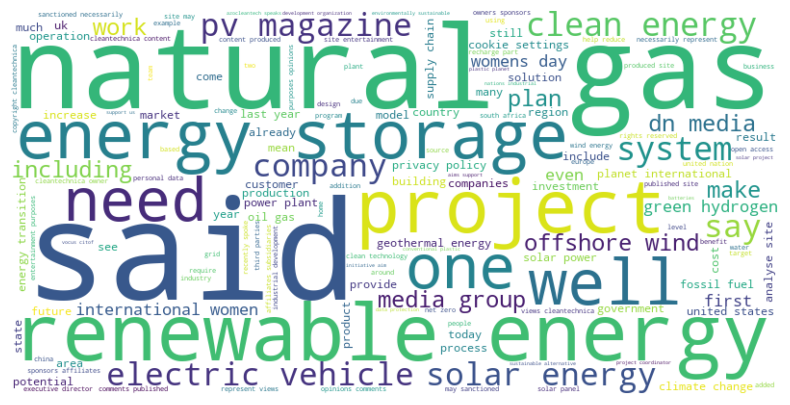

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the cleaned_text into a single string
all_text = ' '.join(data['content'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(all_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df.to_csv('stage.csv', index=False)
data.describe()


,Unnamed: 0,word_counts,doc_length,polarity
count,9583.000000,9583.000000,9583.000000,9583.000000
mean,49728.929458,464.686424,3568.438276,0.111367
std,28758.950929,264.468021,2032.174735,0.060715
min,1280.000000,110.000000,795.000000,-0.247789
25%,17166.500000,263.000000,2023.500000,0.072340
50%,46017.000000,401.000000,3089.000000,0.107928
75%,79780.500000,596.000000,4561.000000,0.147775
max,82343.000000,1815.000000,15338.000000,0.458333


In [ ]:
from collections import Counter

# Assuming 'cleaned_text' is the column containing cleaned text in your DataFrame
text_data = data['content'].str.split().sum()  # Combine all cleaned_text into a list of words
word_frequencies = Counter(text_data)

# Print the word frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')


qatar: 113
petroleum: 587
qp: 26
targeting: 304
aggressive: 189
cuts: 213
greenhouse: 1654
gas: 19143
emissions: 8207
prepares: 44
launch: 848
phase: 1133
2: 2467
planned: 1028
48: 433
million: 6874
ton: 229
per: 3353
year: 10945
lng: 3214
expansion: 1196
latest: 2416
sustainability: 2019
report: 3611
published: 4843
wednesday: 541
said: 16959
goals: 2026
include: 2078
reducing: 1454
intensity: 336
qatars: 5
facilities: 1964
25: 1396
upstream: 504
least: 1582
15: 1938
company: 11583
also: 15801
aiming: 397
reduce: 5028
flaring: 77
across: 5515
75: 510
raised: 559
carbon: 9508
capture: 2594
storage: 13705
ambitions: 360
5: 1793
tonsyr: 30
7: 869
2027: 268
22: 571
goal: 3580
come: 2246
32: 268
tonyr: 15
1: 3078
known: 1007
north: 3510
field: 3639
east: 1230
project: 14048
11: 844
south: 3474
raise: 452
capacity: 7729
16: 791
currently: 2928
production: 9137
around: 5482
78: 117
eyeing: 42
phased: 51
126: 35
says: 4206
able: 2056
eliminate: 294
routine: 56
2030: 3042
methane: 1110
limited

In [ ]:
import csv
from collections import Counter

# Assuming 'cleaned_text' is the column containing cleaned text in your DataFrame
text_data = data['content'].str.split().sum()  # Combine all cleaned_text into a list of words
word_frequencies = Counter(text_data)

# Save word frequencies to a CSV file
csv_filename = 'word_frequencies.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Word', 'Frequency'])
    for word, frequency in word_frequencies.items():
        csv_writer.writerow([word, frequency])

print(f'Word frequencies saved to {csv_filename}')


Word frequencies saved to word_frequencies.csv


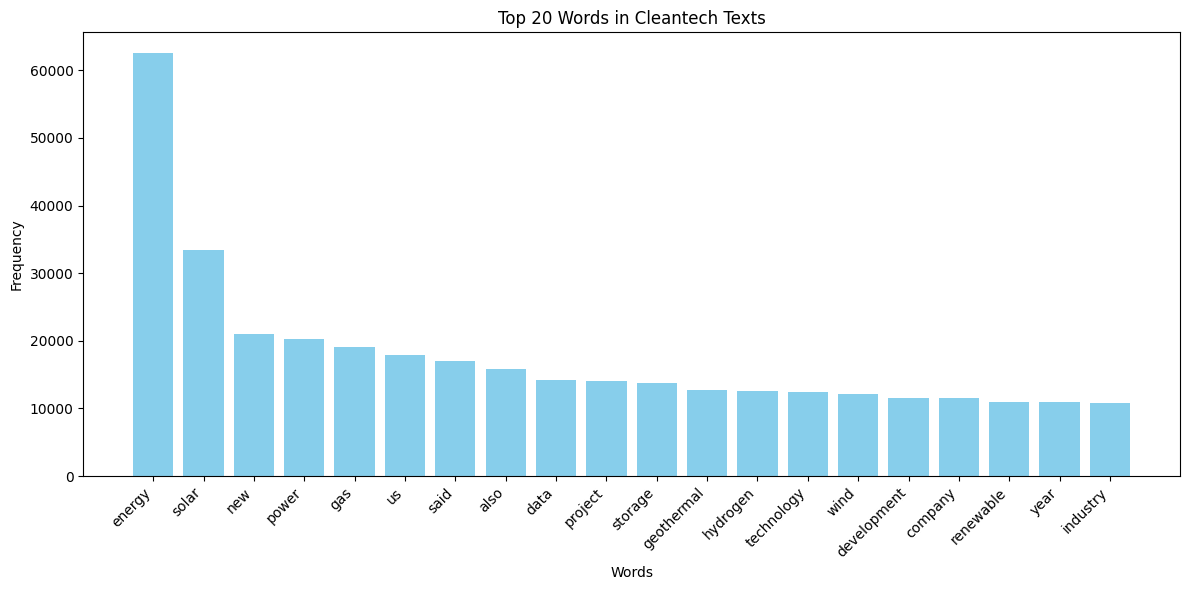

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the word frequencies CSV
word_frequencies = pd.read_csv('word_frequencies.csv')

# Sort the word frequencies by frequency in descending order
word_frequencies = word_frequencies.sort_values(by='Frequency', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(word_frequencies['Word'][:20], word_frequencies['Frequency'][:20], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Cleantech Texts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As one can see in the visualization above, Some of the most frequent word are as follows:
- energy (repeated over 62k times)
- solar (repeated over 32k times)
- new (repeated around 20k times)
- power (repeated around 20k times)
- gas (repeated around 19k times)

# Topic Modeling

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [ ]:
# Following is a quick functiom to loop over a trained topic model and print off the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #{}: {}".format(
            topic_idx,
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        ))
        

Let's find some topics.  We'll check out non-negative matrix factorization (NMF) first.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming df is your DataFrame with a 'title' column
documents = df['title'].tolist()

# Step 2: Create TF-IDF Matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)

# Step 3: Fit NMF Model
nmf = NMF(n_components=10, random_state=42, l1_ratio=0.5).fit(tfidf)

# Step 4: Print Topics
print("\nTopics in NMF model:")
feature_names = tfidf_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}: {', '.join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])}")


NameError: name 'df' is not defined